<a href="https://colab.research.google.com/github/aSafarpoor/NLP/blob/HW0---make-some-text-ready/Q8(prac2_template).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FILL THIS SECTION BY YOUR NAME AND STUDENT CODE** : 

- NAME : Ali Safarpoor Dehkordi
- STUDENT CODE : 99210301

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn#just for drawing better  charts
import math 
import warnings

### Read Dataset

Read the dataset in this section.

In [20]:
def shuffle(x,y):
  perm = np.random.permutation(len(x))
  sx = x.iloc[perm]
  sy = y[perm]
  return sx,sy

def splitter(x,y,train_ratio):
  l = len(x)
  xtrain = x[:int(l*train_ratio)]
  ytrain = y[:int(l*train_ratio)]

  xtest = x[int(l*train_ratio) :]
  ytest = y[int(l*train_ratio) :]

  # return xtrain,ytrain,xtest,ytest
  data = {
        "x_train": xtrain,
        "y_train": ytrain,
        "x_test": xtest,
        "y_test": ytest
  }
  return data


def read_data(path = '' , target_name = 'target' , use_url = True):
  if use_url:
    url = 'https://raw.githubusercontent.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/main/heart.csv'
    pd_data = pd.read_csv(url)
  else:
    pd_data = pd.read_csv( path )
  
  col_name = []
  for i in list(pd_data.columns):
    col_name.append(i)
  
  y_data = pd_data[target_name]
  x_data = pd_data.drop(target_name,axis = 1)
  
  return x_data, y_data, col_name

x,y,col_name = read_data()
x,y = shuffle(x,y)
x.shape,y.shape
# print(x.head,y.head)

data = splitter(x,y,0.8)

data['x_train'].head , data['y_train'].head 

(<bound method NDFrame.head of      age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
 18    43    1   0       150   247  ...      0      1.5      2   0     2
 235   51    1   0       140   299  ...      1      1.6      2   0     3
 94    45    0   1       112   160  ...      0      0.0      1   0     2
 42    45    1   0       104   208  ...      1      3.0      1   0     2
 209   59    1   0       140   177  ...      1      0.0      2   1     3
 ..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
 197   67    1   0       125   254  ...      0      0.2      1   2     3
 259   38    1   3       120   231  ...      1      3.8      1   0     3
 58    34    1   3       118   182  ...      0      0.0      2   0     2
 280   42    1   0       136   315  ...      1      1.8      1   0     1
 271   61    1   3       134   234  ...      0      2.6      1   2     2
 
 [242 rows x 13 columns]>, <bound method NDFrame.head of 18     1
 235    0
 94     1
 42   

### Prepare Dataset

First of all, search for missing values in the dataset. if there are missing values, handle them however you want.

In [21]:
if data['x_train'].isnull().values.any() or data['y_train'].isnull().values.any() or data['x_test'].isnull().values.any() or data['y_test'].isnull().values.any():
    print("NaN data detected")
else:
    print("pass")

pass


### Declare feature vector and target variable

Here, you are supposed to convert pandas data frame into feature vectors and target variables

In [22]:
'''I did it in first part of code, its function is this:'''

# y_data = pd_data[target_name]
# x_data = pd_data.drop(target_name,axis = 1)

'I did it in first part of code, its function is this:'

### Split data into separate training and test set

Now it's time to split X and y into separate training and test set. You can use the sklearn library for this section.

In [23]:
# I did it in first part of code
# its function is this:
def splitter(x,y,train_ratio):
  l = len(x)
  xtrain = x[:int(l*train_ratio)]
  ytrain = y[:int(l*train_ratio)]

  xtest = x[int(l*train_ratio) :]
  ytest = y[int(l*train_ratio) :]

  data = {
        "x_train": xtrain,
        "y_train": ytrain,
        "x_test": xtest,
        "y_test": ytest
  }
  return data


In this cell, you are going to implement your decision tree. Feel free to add more arguments to functions or add your desired functions.

## Implement desicion tree algorithm

In [24]:
class Node:
  def __init__(self, id, n_type, true_child = 0, neg_child = 0, feature = 0, result = 0):
    self.id = id
    self.n_type = n_type
    self.true_child = true_child
    self.neg_child = neg_child
    self.feature = feature
    self.result = result

  def prt(self):
    if self.n_type == "leaf":
      print(self.id)
      print(self.result)
    else:
      print(self.id)
      print(self.feature)
      print(self.true_child.id)
      print(self.neg_child.id)

In [65]:
class DecisionTree:
  def __init__(self, criterion="entropy", max_depth=13):
    self.nodes = []
    self.root = 0
    if max_depth == None:
        self.max_depth = 20
    self.max_depth=max_depth 
    self.criterion = criterion

  def fit(self, data):
    self.root = self.make_tree_rec(data, 1, self.max_depth)
    self.nodes.append(self.root)
    return self.root
    s = int(input())
    while(s != -1):
        node = self.nodes[s]
        node.prt()
        print("-------------------")

        s = int(input())

  def make_tree_rec(self, data, depth, max_depth):
    x_train_mean = data["x_train"].mean()
    x_train_bin = data["x_train"] > x_train_mean
    cols = x_train_bin.columns

    pos_percentage = len(data["y_train"].loc[data["y_train"] == True]) / len(data["y_train"])
    if depth > max_depth:
      if pos_percentage > 0.5:
        result = True
      else:
        result = False
      node = Node(len(self.nodes), "leaf", result=result)
      self.nodes.append(node)
      return node
    elif pos_percentage == 0:
      node = Node(len(self.nodes), "leaf", result=False)
      self.nodes.append(node)
      return node
    elif pos_percentage == 1:
      node = Node(len(self.nodes), "leaf", result=True)
      self.nodes.append(node)
      return node
    
    if self.criterion == 'entropy':
      ents = []
      for col in cols:
        sel_col = x_train_bin[col]
        entropy = 0
        for class_type in [True, False]:
          class_x = sel_col[sel_col == class_type]
          class_y = data["y_train"][sel_col == class_type]
          if len(class_x) == 0:
            continue
          pos_prob = len(class_x[class_y == True]) / len(class_x)
          if pos_prob == 1 or pos_prob == 0:
            class_entropy = 0
            continue
          else:
            class_entropy = pos_prob * math.log2(pos_prob) + (1 - pos_prob) * math.log2(1 - pos_prob)
          entropy += (len(class_x) / len(sel_col)) * -1 * (class_entropy)
        ents.append((col, entropy))

      best_col = min(ents, key = lambda a: a[1])[0]

    else: # criterion = 'gini':
      gins = []
      for col in cols:
        sel_col = x_train_bin[col]
        gini = 0
        for class_type in [True, False]:
          class_x = sel_col[sel_col == class_type]
          class_y = data["y_train"][sel_col == class_type]
          if len(class_x) == 0:
            continue
          pos_prob = len(class_x[class_y == True]) / len(class_x)
          if pos_prob == 1 or pos_prob == 0:
            class_gini = 0
            continue
          else:
            # class_gini = pos_prob * math.log2(pos_prob) + (1 - pos_prob) * math.log2(1 - pos_prob)
            class_gini = 1 - (pos_prob**2 + (1-pos_prob)**2)

          gini += (len(class_x) / len(sel_col)) * -1 * (class_gini)
        gins.append((col, gini))

      best_col = min(gins, key = lambda a: a[1])[0]
                                                 
    true_x = data["x_train"][x_train_bin[best_col] == True]
    true_y = data["y_train"][x_train_bin[best_col] == True]
    neg_x =  data["x_train"][x_train_bin[best_col] == False]
    neg_y =  data["y_train"][x_train_bin[best_col] == False]
    if depth < max_depth:
      true_x.drop(best_col,inplace=True, axis=1)
      neg_x.drop(best_col,inplace=True, axis=1)
    new_data_tr = {
        "x_train": true_x,
        "y_train": true_y
    }
    new_data_ng = {
        "x_train": neg_x,
        "y_train": neg_y
    }

    if len(true_y) == 0 or len(neg_y) == 0:
      if pos_percentage > 0.5:
        result = True
      else:
        result = False
      node = Node(len(self.nodes), "leaf", result=result)
      self.nodes.append(node)
      return node

    true_chil = self.make_tree_rec(new_data_tr, depth+1, max_depth)
    neg_chil = self.make_tree_rec(new_data_ng, depth+1, max_depth)

    node = Node(len(self.nodes), "node", feature=best_col, true_child=true_chil, neg_child=neg_chil)
    self.nodes.append(node)
    return node
  
  def get_result_on_tree(self, row, node):
    if node.n_type == "leaf":
      return node.result
    feature = node.feature
    if row.loc[feature] == True:
      return self.get_result_on_tree(row, node.true_child)
    else:
      return self.get_result_on_tree(row, node.neg_child)

warnings.filterwarnings('ignore')
DTree = DecisionTree(criterion= 'entropy', max_depth=13 )
DTree.fit(data)

### Part 1 : Compare Gini and Entropy 

In [66]:
DTreeG = DecisionTree( criterion='gibi')
DTreeE = DecisionTree( criterion='entropy')

In this cell, fit both declared trees on the train set and predict values on the test set.

In [52]:
rootg = DTreeG.fit(data)
roote = DTreeE.fit(data)

In [60]:
tp = fp = tn = fn = 0
tup_xy  = (data["x_train"], data["y_train"])
x_datas, y_datas = tup_xy[0], tup_xy[1]
x_datas_mean = x_datas.mean()
x_datas_bin = x_datas > x_datas_mean
corrects = 0
for i in range(len(y_datas)):
  res = DTreeG.get_result_on_tree(x_datas_bin.iloc[i], rootg)
  reshat = y_datas.iloc[i]
  if res == reshat:
    corrects += 1
  if res == 1:
    if reshat == 1:
      tp+=1
    else:
      fp+=1
  else:
    if reshat == 1:
      fn+=1
    else:
      tn+=1
cm_traing = [tp, fp,tn, fn]
acc = corrects / len(y_datas)
print('train gini:' ,acc)

tp = fp = tn = fn = 0
tup_xy  = (data["x_test"], data["y_test"])
x_datas, y_datas = tup_xy[0], tup_xy[1]
x_datas_mean = x_datas.mean()
x_datas_bin = x_datas > x_datas_mean
corrects = 0
for i in range(len(y_datas)):
  #print(x_datas_bin.iloc[i])
  res = DTreeG.get_result_on_tree(x_datas_bin.iloc[i], rootg)
  reshat = y_datas.iloc[i]
  if res == reshat:
    corrects += 1
  if res == 1:
    if reshat == 1:
      tp+=1
    else:
      fp+=1
  else:
    if reshat == 1:
      fn+=1
    else:
      tn+=1
cm_testg = [tp, fp,tn, fn]
acc = corrects / len(y_datas)
print("test gini" ,acc)

tp = fp = tn = fn = 0
tup_xy  = (data["x_train"], data["y_train"])
x_datas, y_datas = tup_xy[0], tup_xy[1]
x_datas_mean = x_datas.mean()
x_datas_bin = x_datas > x_datas_mean
corrects = 0
for i in range(len(y_datas)):
  #print(x_datas_bin.iloc[i])
  res = DTreeE.get_result_on_tree(x_datas_bin.iloc[i], roote)
  reshat = y_datas.iloc[i]
  if res == reshat:
    corrects += 1
  if res == 1:
    if reshat == 1:
      tp+=1
    else:
      fp+=1
  else:
    if reshat == 1:
      fn+=1
    else:
      tn+=1
cm_trainent = [tp, fp,tn, fn]
acc = corrects / len(y_datas)
print('train entropy',acc)

tp = fp = tn = fn = 0
tup_xy  = (data["x_test"], data["y_test"])
x_datas, y_datas = tup_xy[0], tup_xy[1]
x_datas_mean = x_datas.mean()
x_datas_bin = x_datas > x_datas_mean
corrects = 0
for i in range(len(y_datas)):
  #print(x_datas_bin.iloc[i])
  res = DTreeE.get_result_on_tree(x_datas_bin.iloc[i], roote)
  reshat = y_datas.iloc[i]
  if res == reshat:
    corrects += 1
  if res == 1:
    if reshat == 1:
      tp+=1
    else:
      fp+=1
  else:
    if reshat == 1:
      fn+=1
    else:
      tn+=1
cm_testent = [tp, fp,tn, fn]
acc = corrects / len(y_datas)
print('test entropy',acc)

print(" ")
for i in [cm_traing,cm_trainent,cm_testg,cm_testent]:
  print(i)

train gini: 0.6570247933884298
test gini 0.5573770491803278
train entropy 0.9049586776859504
test entropy 0.7049180327868853
 
[74, 24, 85, 59]
[123, 13, 96, 10]
[14, 9, 20, 18]
[21, 7, 22, 11]


Plot confusion matrix for both decision trees.

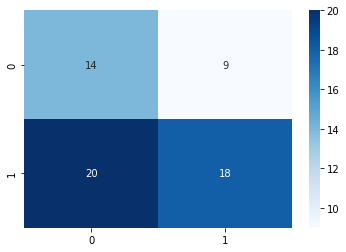

In [61]:
a = cm_testg
seaborn.heatmap([[a[0],a[1]],[a[2],a[3]]],annot=True, fmt='', cmap='Blues')

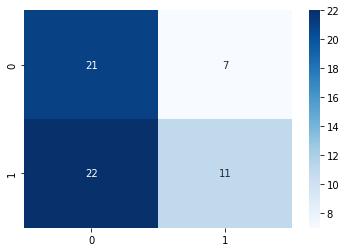

In [62]:
a = cm_testent
seaborn.heatmap([[a[0],a[1]],[a[2],a[3]]],annot=True, fmt='', cmap='Blues')

In [94]:
print("in Gini: ", "tp=" , resg[0] , ' tn=' , resg[1] , ' fp=' , resg[2] , ' fn=' , resg[3])
print("in Entropy: ", "tp=" , rese[0] , ' tn=' , rese[1] , ' fp=' , rese[2] , ' fn=' , rese[3])

in Gini:  tp= 69  tn= 24  fp= 114  fn= 96
in Entropy:  tp= 145  tn= 11  fp= 127  fn= 20


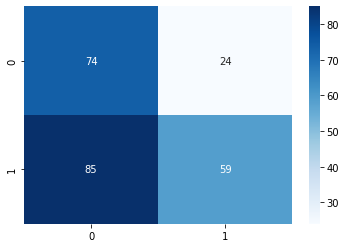

In [63]:
a = cm_traing
seaborn.heatmap([[a[0],a[1]],[a[2],a[3]]],annot=True, fmt='', cmap='Blues')

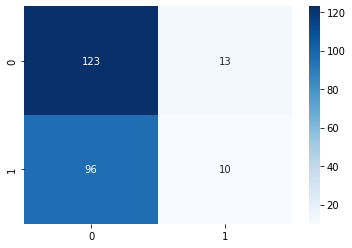

In [64]:
a = cm_trainent
seaborn.heatmap([[a[0],a[1]],[a[2],a[3]]],annot=True, fmt='', cmap='Blues')

### Part 2 : Let's add maximum depth!

In [35]:
def test_tree(criterion,data,max_depth = 13):
  DTree = DecisionTree(max_depth=max_depth , criterion=criterion)
  root = DTree.fit(data)

  accs = []
  for tup_xy in [(data["x_train"], data["y_train"]), (data["x_test"], data["y_test"])]:
    x_datas, y_datas = tup_xy[0], tup_xy[1]
    x_datas_mean = x_datas.mean()
    x_datas_bin = x_datas > x_datas_mean
    corrects = 0
    for i in range(len(y_datas)):
      #print(x_datas_bin.iloc[i])
      res = get_result_on_tree(x_datas_bin.iloc[i], root)
      if res == y_datas.iloc[i]:
        corrects += 1
    acc = corrects / len(y_datas)
    accs.append(acc)
  return accs
  
def plot_tree_acc(data,criterion,max_depth):
  train_accs = []
  test_accs = []
  for i in range(1, max_depth+1):
    accs = test_tree(data=data,max_depth= i,criterion=criterion)
    train_accs.append(accs[0])
    test_accs.append(accs[1])

  plt.plot(range(1, len(test_accs)+1), train_accs, label = "Train Accuracy")
  plt.plot(range(1, len(test_accs)+1), test_accs, label = "Test Accuracy")
  plt.xlabel("Maximum Depth of Tree")
  plt.ylabel('acc')
  plt.title(criterion)
  plt.legend()
  plt.show()
  

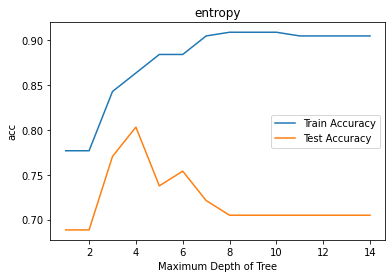

In [36]:
plot_tree_acc(data=data,max_depth=14,criterion='entropy')

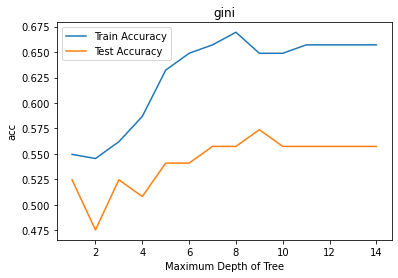

In [37]:
plot_tree_acc(data=data,max_depth=14,criterion='gini')

In [ ]:
for depth, score in zip(max_depths, accuracy_scores):
    print(f"Depth : {depth}, Accuracy : {score}")

Now compare the accuracy score of decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees.

for **train** best depth is around `10 to 12`
without depth I used more number than data feature infact and it is same as a depth, bytheway output is same in training.

but in **test** we see overfitting around `4-6` in entropy and around 8 in gini, and it means limited depth is better at all.

between **gini** and **entropy**, gini is **overftting** sooner and its **accuracy** is less than entropy, so based of this info entropy is better.

In [ ]:
# for train best depth is around 10 to 12
# without depth I used more number than data feature infact and it is same as a depth, bytheway output is same in training.
# but we see overfitting around 4-6 in entropy and around 8 in gini, and it means limited depth is better at all.

# between gini and entropy, gini is overftting sooner and its accuracy is less than entropy, so based of this info entropy is better.